<b style='font-size:26px;font-family:Arial;color:#E37C4D'>Text Analytics using 'teradatagenai' Package</b>

#### Disclaimer

The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Setting Up the Environment</b>

Before we start working with our data, we need to set up our environment. This involves importing the necessary packages and establishing a connection to Vantage.

Here's how we can do this:

In [ ]:
import os
from getpass import getpass
from teradataml import create_context, DataFrame
from teradatagenai import TextAnalyticsAI, TeradataAI, load_data

In [ ]:
# Creating connection with Vantage.
create_context(host=getpass.getpass("Host: "), user=getpass.getpass("User: "), password=getpass.getpass("Password: "))

Engine(teradatasql://:***@rtan-tdvm-smp-4857?user=TEST)

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Loading the data</b>

We will be loading the sample data using the 'load_data()' helper function.

In [4]:
load_data('employee', 'employee_data')
data = DataFrame('employee_data')
data

employee_id,employee_name,employee_data,articles,reviews,quotes
1,Parker Doe,Parker Doe originally from Brazil has successfully cleared all their loans by 2020 04 25 Reach them,Climate change poses significant challenges globally affecting weather patterns ecosystems and human,Todays food delivery was quicker than yesterdays Appreciated it,El tiempo es oro
4,Michael Brown,Michael Brown an Australian has a loan due on 2023 07 20 Contact them at 555 555 5558 Their SSN is 6,The recent 2020 United States elections have shown a shift in the political landscape With more youn,Both the food and the delivery service were topnotch,Geniet van de kleine dingen.
2,Alex Smith,Alex Smith a Canadian has an outstanding loan due on 2022 05 30 Their contact number is 555 555 5556,The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,The food was excellent but it arrived a bit late,Apres la pluie le beau temps
3,Emily Johnson,Emily Johnson from the UK cleared all their loans by 2021 01 15 They can be contacted at 555 555 555,Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,The delivery was prompt but the food was spilled and the portion size was small,La vie est belle
5,Linda Taylor,Linda Taylor a German cleared all their loans by 2020 12 31 They can be reached at 555 555 5559 Thei,The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,The food was average and the delivery person was rude,Wees de verandering die je in de wereld wil zien gebeuren


In [20]:
load_data('question', 'question_data')
question = DataFrame('question_data')
question

id,text_data
6,Why is the Great Wall of China considered a marvel?
5,What is Peshawar known for historically?
5,What type of goods is Peshawar famous for?
2,What is in Karachi?
4,Which city is known as the cultural capital of Pakistan?
4,What landmarks are UNESCO World Heritage sites in Lahore?
4,What is Lahore famous for besides its landmarks?
2,Does it have a desert?
5,Which city serves as the gateway to the Khyber Pass?
6,How long is the Great Wall of China?


In [21]:
load_data('context', 'context_data')
context = DataFrame('context_data')
context

id,text_data
2,Karachi is part of the Sindh province and includes areas with desert landscapes.
4,"The city is home to the Lahore Fort and Badshahi Mosque, which are UNESCO World Heritage sites."
4,Lahore is also known for its vibrant food scene and colorful festivals.
6,The Great Wall of China is an ancient fortification built to protect against invasions.
6,"It is one of the most visited tourist attractions in the world, attracting millions of tourists ever"
5,Peshawar is a city in Khyber Pakhtunkhwa known for its rich history and ancient bazaars.
5,The city serves as a gateway to the historic Khyber Pass.
5,Peshawar is famous for its traditional cuisine and handcrafted goods.
6,"The Wall stretches over 13,000 miles and is considered a marvel of engineering."
4,"Lahore, known as the cultural capital of Pakistan, is famous for its historical landmarks."


<b style='font-size:28px;font-family:Arial;color:#E37C4D'>Teradata Python package for Generative-AI</b>

The following outlines a general workflow for ‘teradatagenai’. Users can utilize Python to perform a range of text analytics tasks on data stored in Vantage. This can be achieved by leveraging Teradata's Bring Your Own Large Language Model offering or by using In-DB TextAnalytics AI functions to access models provided by AWS, Azure, Nim and GCP.

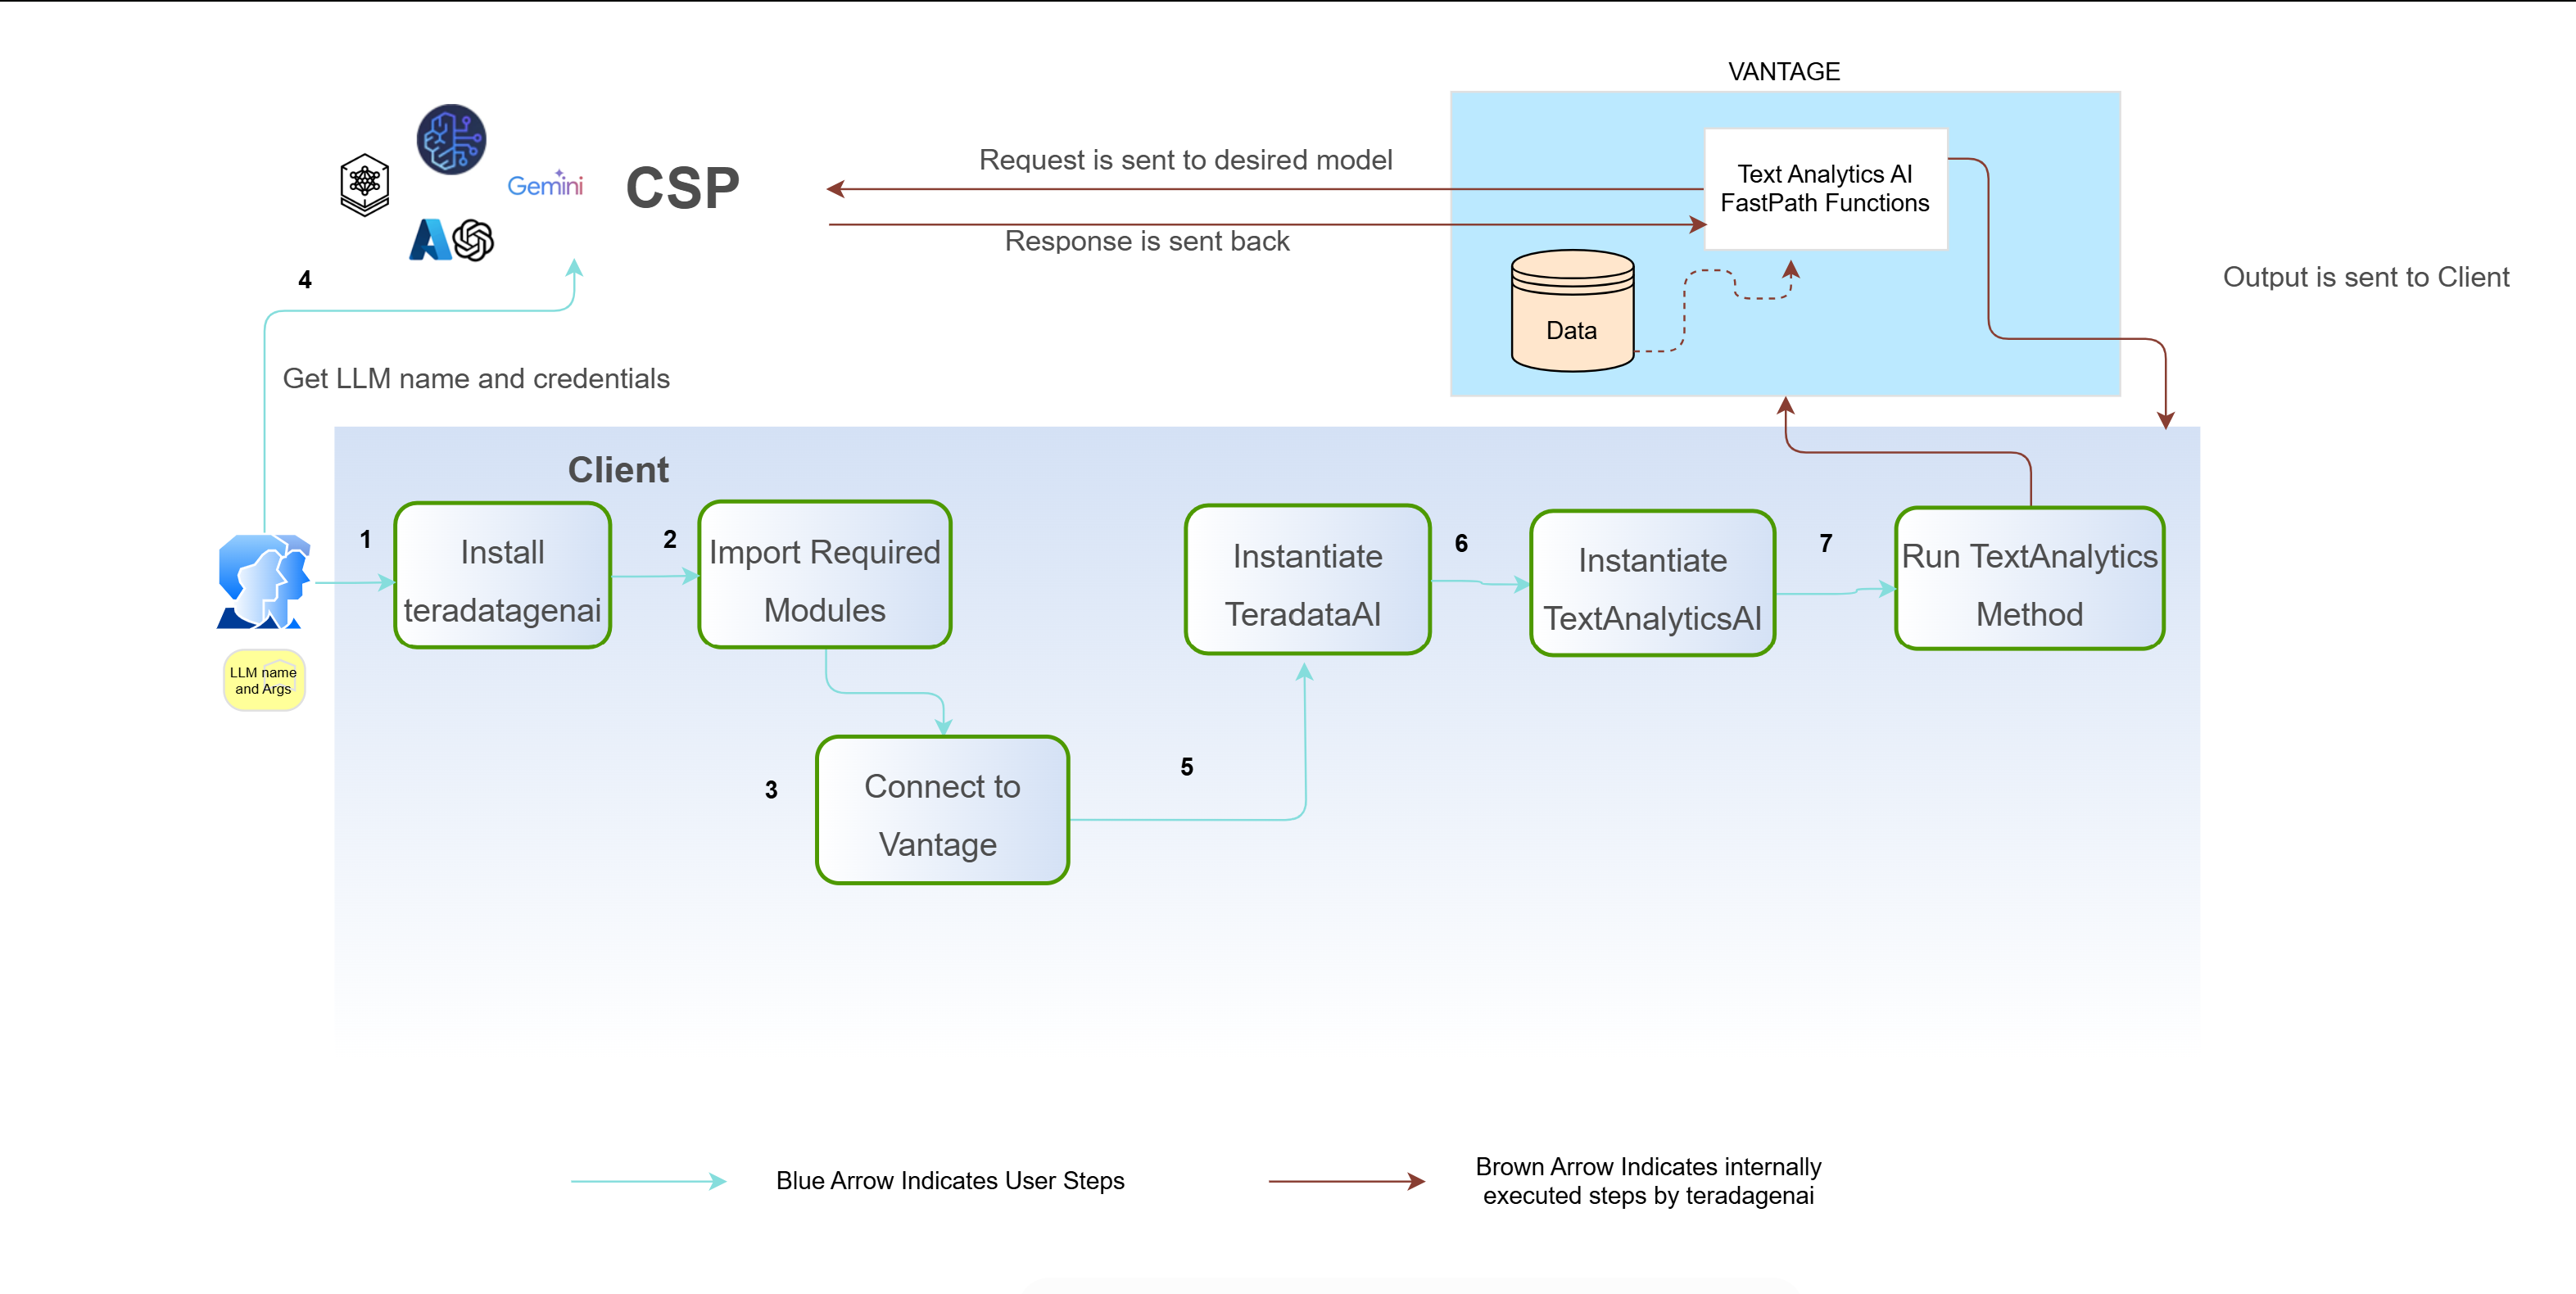


<b style='font-size:28px;font-family:Arial;color:#E37C4D'>Setting up TeradataAI to access NVidia Nim Model</b>

This section describes how to instantiate the `TeradataAI` class to set up the environment and initialize the LLM endpoint.

Users can provide the required authorization information in four different ways:

1. Explicitly pass the authorization information to each argument of the function.
2. Set the environment variables related to the authorization arguments.
3. Supply the authorization information via a configuration file.
4. Pass an existing database authorization object containing the credentials using the authorization parameter.


In [5]:
# Set the environment variables related to the authorization arguments securely.
os.environ['NVIDIA_API_KEY'] = getpass("Enter your NVDIA NIM API Key: ")

In [ ]:
llm_nim = TeradataAI(api_type="nim",
                     api_base=getpass("Enter your NVDIA NIM Model endpoint: "),
                     model_name="mistralai/mistral-7b-instruct-v0.3",
                     )

<b style='font-size:28px;font-family:Arial;color:#E37C4D'>Setting up TextAnalyticsAI to Perform Various Text Analytics Tasks</b>

This section describes how to instantiate the `TextAnalyticsAI` class to access a variety of text analytics methods.

### **Key Notes:**

- **General Method Arguments:**
    - **`column`**:  
        Specifies the name of the column to be used.  
        - Type: `str`  

    - **`data`**:  
        Specifies the `teradataml.DataFrame` that includes the column specified by the `column` argument.  
        - Type: `teradataml.DataFrame`  

- **Optional Parameters:**
    - **`persist`**:  
        Specifies whether to persist the output in permanent tables.  
        - Type: `bool`  
        - Default: `False`  

    - **`accumulate`**:  
        Specifies the name(s) of input `teradataml.DataFrame` column(s) to copy to the output. By default, all input columns are copied to the output.  
        - Type: `str`

    - **`volatile`**:  
        Specifies whether to store the results in a volatile table.  
        - Type: `bool`  
        - Default: `False`  

- **Additional Arguments (`**kwargs`)**:  
    Methods accept additional arguments that can be passed as part of `**kwargs`. For more details, refer to the user guide.


In [ ]:
# Instantiate the TextAnalyticsAI class with the NVdia NIM model.
obj = TextAnalyticsAI(llm=llm_nim)

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Sentiment Analysis  </b>

In this section, we'll explore the `analyze_sentiment()` function provided by TextAnalyticsAI. Based on the text analysis, the sentiment can be positive, negative, or neutral.

In [10]:
# Analyze the sentiment of the reviews in the employee data.
obj.analyze_sentiment(column="reviews",data=data,accumulate='reviews')

reviews,Sentiment,Message
The food was excellent but it arrived a bit late,positive,
Todays food delivery was quicker than yesterdays Appreciated it,positive,
Both the food and the delivery service were topnotch,positive,
The delivery was prompt but the food was spilled and the portion size was small,negative,
The food was average and the delivery person was rude,negative,


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Text Classification </b>

In this section, we'll explore the `classify()` function provided by TextAnalyticsAI. This function is used to classify the given text.

In [11]:
# Classify the articles in the employee data into multiple categories.
obj.classify(column="articles", data=data, accumulate="articles", labels=["sports", "politics", "entertainment", "technology"], multi_label=True)

articles,Labels,Message
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,[\technology\ \sports\,
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,[\technology\ \politics\,
The recent 2020 United States elections have shown a shift in the political landscape With more youn,[\politics\,
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,[\sports\ \technology\,
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,[\technology\ \entertainment\ \politics\ \environment\,


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Text Summarization</b>

In this section, we'll explore the `summarize()` function provided by TextAnalyticsAI. This function is used to generate a concise summary of a given text. 

In [12]:
# Summarize the articles in the employee data.
obj.summarize(column="articles",data=data,accumulate='articles',volatile=True)

articles,Summary,Count,Message
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,"Climate change presents global challenges, affecting weather patterns, ecosystems, and human life.",116,
The recent 2020 United States elections have shown a shift in the political landscape With more youn,"Younger voters have significantly influenced the 2020 United States elections, shifting the political landscape.",133,
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic. (First postponement of the Olympics due to a pandemic),170,
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,"Renewable energy sources like solar, wind, and hydroelectric power significantly contribute to reducing carbon emissions.",143,
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"The 2019 Amazon rainforest wildfires were a severe environmental crisis, causing extensive destruction through the burning of thousands of acres.",175,


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Key Phrase Extraction</b>

In this section, we'll explore the `extract_key_phrases()` function provided by TextAnalyticsAI. This function is used to extract key phrases from a given text. These key phrases can provide a quick understanding of the main concepts in the text.

In [13]:
# Extract key phrases from the articles in the employee data.
obj.extract_key_phrases(column="articles",data=data,accumulate='employee_name:articles',volatile=True)

employee_name,employee_data,articles,Key_Phrases,Message
Linda Taylor,Linda Taylor a German cleared all their loans by 2020 12 31 They can be reached at 555 555 5559 Thei,The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"2019 Amazon rainforest wildfires, severe environmental crisis, thousands of fires",
Parker Doe,Parker Doe originally from Brazil has successfully cleared all their loans by 2020 04 25 Reach them,Climate change poses significant challenges globally affecting weather patterns ecosystems and human,"climate change, significant challenges, weather patterns, ecosystems, human",
Emily Johnson,Emily Johnson from the UK cleared all their loans by 2021 01 15 They can be contacted at 555 555 555,Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,"renewable energy sources, solar, wind, hydroelectric power, reducing",
Michael Brown,Michael Brown an Australian has a loan due on 2023 07 20 Contact them at 555 555 5558 Their SSN is 6,The recent 2020 United States elections have shown a shift in the political landscape With more youn,\2020 United States elections\ \political landscape\ \young\,
Alex Smith,Alex Smith a Canadian has an outstanding loan due on 2022 05 30 Their contact number is 555 555 5556,The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,\2020 Tokyo Olympics\ \2021\ \COVID-19 pandemic\ \first time\ \2020\ \Tokyo Olympics\,


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Masking Personal Information Identification (PII) Entities</b>

In this section, we'll explore the `mask_pii()` function provided by TextAnalyticsAI. This function is used to mask Personal Identifiable Information (PII) entities within a given text. This can be particularly useful when you want to protect sensitive data in your text.

In [14]:
# Mask PII (Personally Identifiable Information) in the employee data.
obj.mask_pii(column="employee_data",data=data,accumulate='employee_data',volatile=True)

employee_data,PII_Entities,Masked_Phrase,Message
Linda Taylor a German cleared all their loans by 2020 12 31 They can be reached at 555 555 5559 Thei,"('Name'='Linda Taylor', 'start_position'=0, 'length'=12), ('Nationality'='German', 'start_position'=15, 'length'=6), ('date/time'='2020 12 31', 'start_position'=49, 'length'=10), ('Contact numbers'='555 555 5559', 'start_position'=83, 'length'=12), ('Serial numbers'='Thei', 'start_position'=96, 'length'=4)",************ a ****** cleared all their loans by ********** They can be reached at ************ ****,
Parker Doe originally from Brazil has successfully cleared all their loans by 2020 04 25 Reach them,"('Name'='Parker Doe', 'start_position'=0, 'length'=10), ('Country_of_Origin'='Brazil', 'start_position'=27, 'length'=6), ('date/time'='2020 04 25', 'start_position'=78, 'length'=10)",********** originally from ****** has successfully cleared all their loans by ********** Reach them,
Emily Johnson from the UK cleared all their loans by 2021 01 15 They can be contacted at 555 555 555,"('Name'='Emily Johnson', 'start_position'=0, 'length'=13), ('Country'='UK', 'start_position'=23, 'length'=2), ('date/time'='2021 01 15', 'start_position'=53, 'length'=10), ('contact numbers'='555 555 555', 'start_position'=89, 'length'=11)",************* from the ** cleared all their loans by ********** They can be contacted at ***********,
Michael Brown an Australian has a loan due on 2023 07 20 Contact them at 555 555 5558 Their SSN is 6,"('Name'='Michael Brown', 'start_position'=0, 'length'=13), ('Nationality'='Australian', 'start_position'=17, 'length'=10), ('date/time'='2023 07 20', 'start_position'=46, 'length'=10), ('Contact Number'='555 555 5558', 'start_position'=73, 'length'=12), ('SSN'='6', 'start_position'=99, 'length'=1)",************* an ********** has a loan due on ********** Contact them at ************ Their SSN is *,
Alex Smith a Canadian has an outstanding loan due on 2022 05 30 Their contact number is 555 555 5556,"('Name'='Alex Smith', 'start_position'=0, 'length'=10), ('Nationality'='Canadian', 'start_position'=13, 'length'=8), ('date/time'='2022 05 30', 'start_position'=53, 'length'=10), ('Contact numbers'='555 555 5556', 'start_position'=88, 'length'=12)",********** a ******** has an outstanding loan due on ********** Their contact number is ************,


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Recognizing Personal Information Identification (PII) Entities</b>

In this section, we'll delve into the `recognize_pii_entities()` function provided by TextAnalyticsAI. This function is designed to identify Personal Identifiable Information (PII) entities within text data. PII entities can include sensitive data like 'names', 'addresses', 'social security numbers', 'email addresses', 'phone numbers', etc.

In [15]:
# Recognize PII entities in the employee data.
obj.recognize_pii_entities(column="employee_data",data=data,accumulate='employee_data',volatile=True)

employee_data,PII_Entities,Message
Parker Doe originally from Brazil has successfully cleared all their loans by 2020 04 25 Reach them,"('Name'='Parker Doe', 'start_position'=0, 'length'=10), ('Country_of_Origin'='Brazil', 'start_position'=27, 'length'=6), ('date/time'='2020 04 25', 'start_position'=78, 'length'=10)",
Michael Brown an Australian has a loan due on 2023 07 20 Contact them at 555 555 5558 Their SSN is 6,"('Name'='Michael Brown', 'start_position'=0, 'length'=13), ('Nationality'='Australian', 'start_position'=17, 'length'=10), ('date/time'='2023 07 20', 'start_position'=46, 'length'=10), ('Contact numbers'='555 555 5558', 'start_position'=73, 'length'=12), ('SSN'='6', 'start_position'=99, 'length'=1)",
Alex Smith a Canadian has an outstanding loan due on 2022 05 30 Their contact number is 555 555 5556,"('Name'='Alex Smith', 'start_position'=0, 'length'=10), ('Nationality'='Canadian', 'start_position'=13, 'length'=8), ('date/time'='2022 05 30', 'start_position'=53, 'length'=10), ('Contact numbers'='555 555 5556', 'start_position'=88, 'length'=12)",
Emily Johnson from the UK cleared all their loans by 2021 01 15 They can be contacted at 555 555 555,"('Name'='Emily Johnson', 'start_position'=0, 'length'=13), ('Country'='UK', 'start_position'=23, 'length'=2), ('date/time'='2021 01 15', 'start_position'=53, 'length'=10), ('contact numbers'='555 555 555', 'start_position'=89, 'length'=11)",
Linda Taylor a German cleared all their loans by 2020 12 31 They can be reached at 555 555 5559 Thei,"('Name'='Linda Taylor', 'start_position'=0, 'length'=12), ('Nationality'='German', 'start_position'=15, 'length'=6), ('date/time'='2020 12 31', 'start_position'=49, 'length'=10), ('Contact numbers'='555 555 5559', 'start_position'=83, 'length'=12), ('Serial numbers'='Thei', 'start_position'=96, 'length'=4)",


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Language Translation </b>

In this section, we'll explore the `translate()` function provided by TextAnalyticsAI. This function is used to translate the language of a given text.

In [16]:
# Translate the quotes in the employee data to the default language English.
obj.translate(column="quotes",data=data,accumulate='quotes',volatile=True)

quotes,Translation,Message
El tiempo es oro,The time is gold (idiomatic expression: time is precious),
Geniet van de kleine dingen.,Enjoy the small things.,
Apres la pluie le beau temps,"After the rain, good weather",
La vie est belle,Life is beautiful,
Wees de verandering die je in de wereld wil zien gebeuren,Let the change you want to see in the world occur,


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Language Detection </b>

In this section, we'll explore the `detect_language()` function provided by TextAnalyticsAI. This function is used to identify the language of a given text.

In [17]:
# Detect the language of the quotes in the employee data 
obj.detect_language(column="quotes",data=data,volatile=True)

employee_id,employee_name,employee_data,articles,reviews,quotes,Language,Message
5,Linda Taylor,Linda Taylor a German cleared all their loans by 2020 12 31 They can be reached at 555 555 5559 Thei,The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,The food was average and the delivery person was rude,Wees de verandering die je in de wereld wil zien gebeuren,Dutch,
1,Parker Doe,Parker Doe originally from Brazil has successfully cleared all their loans by 2020 04 25 Reach them,Climate change poses significant challenges globally affecting weather patterns ecosystems and human,Todays food delivery was quicker than yesterdays Appreciated it,El tiempo es oro,Spanish,
3,Emily Johnson,Emily Johnson from the UK cleared all their loans by 2021 01 15 They can be contacted at 555 555 555,Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,The delivery was prompt but the food was spilled and the portion size was small,La vie est belle,French,
4,Michael Brown,Michael Brown an Australian has a loan due on 2023 07 20 Contact them at 555 555 5558 Their SSN is 6,The recent 2020 United States elections have shown a shift in the political landscape With more youn,Both the food and the delivery service were topnotch,Geniet van de kleine dingen.,Dutch,
2,Alex Smith,Alex Smith a Canadian has an outstanding loan due on 2022 05 30 Their contact number is 555 555 5556,The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,The food was excellent but it arrived a bit late,Apres la pluie le beau temps,French,


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'> Entity Recognition </b>

In this section, we delve into the `recognize_entities()` function, provided by TextAnalyticsAI. This function is designed to identify a wide range of entities within text data. These entities can include 'people', 'places', 'products', 'organizations', 'date/time', 'quantities', 'percentages', 'currencies', and 'names'.

In [18]:
# Recognize entities in the articles in the employee data.
obj.recognize_entities(column="articles",data=data,accumulate='articles')

articles,Labeled_Entities,Message
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,"(solar, energy), (wind, energy), (hydroelectric, energy), (power, quantities)",
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,"(climate change, nan), (weather patterns, nan), (ecosystems, nan), (human, people)",
The recent 2020 United States elections have shown a shift in the political landscape With more youn,"(2020, date/time), (United States, places), (elections, events), (political landscape, concepts), (shift, events), (youn, nan)",
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,"(2020 Tokyo Olympics, events), (2021, date/time), (COVID-19 pandemic, events)",
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"(2019, date/time), (Amazon rainforest, places), (wildfires, events)",


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Asking the LLM </b>

In this section, we'll explore the `ask()` function provided by TextAnalyticsAI. This function is used to ask questions to the LLM based on the given context.

In [22]:
# Asking questions to the LLM using context data.
# data_partition_column: 'id' and context_partition_column: 'id' are used to partition the data and context tables.
# Prompt is used to provide a template for the question and data.
obj.ask(column="text_data", data=question,
        context=context, context_column='text_data',
        data_partition_column='id', context_partition_column='id',
        prompt='''Provide an answer to the question using data as
        information relevant to the question.
        \nQuestion: #QUESTION# \n Data: #DATA#''',
        data_position='#DATA#',
        question_position='#QUESTION#')

id,text_data,Response,Message
4,Which city is known as the cultural capital of Pakistan?,The city known as the cultural capital of Pakistan is Lahore.,
4,What is Lahore famous for besides its landmarks?,"Lahore is famous for its vibrant food scene and colorful festivals, in addition to its historical landmarks.",
6,How long is the Great Wall of China?,"The Great Wall of China is approximately 13,000 miles long.",
6,Why is the Great Wall of China considered a marvel?,"The Great Wall of China is considered a marvel due to its immense size and impressive engineering. Spanning over 13,000 miles, it is one of the longest structures ever built. The wall's construction was a monumental feat, involving millions of laborers and thousands of years of continuous development. It was built to protect China from invasions, making it a significant historical and cultural landmark. These factors contribute to its recognition as a marvel of engineering and a major tourist attraction, attracting millions of tourists each year.",
5,What type of goods is Peshawar famous for?,"Peshawar is famous for its traditional cuisine and handcrafted goods. These goods include intricate carpets, woodwork, and metalwork. The city is also known for its locally produced spices, dry fruits, and traditional sweets. Additionally, Peshawar serves as a gateway to the historic Khyber Pass, a major trade route that has played a significant role in the city's history and cultural exchange.",
5,Which city serves as the gateway to the Khyber Pass?,The city that serves as the gateway to the Khyber Pass is Peshawar.,
5,What is Peshawar known for historically?,"Peshawar is historically known for being a gateway to the Khyber Pass, a strategic trade route connecting Afghanistan and India. It has been an important city since ancient times, serving as a crossroads for various civilizations, including the Persians, Greeks, Mauryans, and Kushans. The city's rich history is reflected in its architecture, such as the Bala Hisar Fort and the Mahabodhi Temple ruins. Additionally, Peshawar is known for its traditional cuisine, handcrafted goods, and bustling bazaars.",
6,What is the purpose of the Great Wall of China?,The Great Wall of China was built to protect against invasions.,
4,What landmarks are UNESCO World Heritage sites in Lahore?,"The data provided indicates that Lahore, being the cultural capital of Pakistan, is home to two UNESCO World Heritage sites: Lahore Fort and Badshahi Mosque.",
2,Does it have a desert?,"Yes, Karachi is part of the Sindh province, which includes areas with desert landscapes. However, it's important to note that Karachi itself is not entirely a desert. It's a coastal city with a diverse landscape that includes urban areas, beaches, and ports.",


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Generating Embeddings</b>

In this section, we'll explore the `embeddings()` function provided by TextAnalyticsAI.

In [ ]:
# Instantiate the TeradataAI class with the NVDIA NIM embeddings model.
llm_embedding = TeradataAI(api_type="nim",
                           api_base=getpass("Enter your NVDIA NIM Model endpoint: "),
                           model_name="nvidia/nv-embedqa-e5-v5"
                         )

In [10]:
# Instantiate the TextAnalyticsAI class with the embedding model.
obj_embeddings = TextAnalyticsAI(llm=llm_embedding)

In [11]:
obj_embeddings.embeddings(column="articles",data=data,accumulate='articles',output_format='VARCHAR')

Embedding Message
articles                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Cleanup</b>

In this section, we'll perform cleanup operations to free up resources. 

In [12]:
remove_context()

True